# Imports and palette

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
import os

palette = sns.color_palette("vlag", as_cmap=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Data wrangling and tidying

In [3]:
def check_for_anomaly(df):
    anomaly_detector = NearestNeighbors(n_neighbors = 3)
    anomaly_detector.fit(df)
    
    distances, indexes = anomaly_detector.kneighbors(df)
    # plt.plot(distances.mean(axis = 1), 'bo')
    
    outlier_index = pd.Series(np.where(distances.mean(axis = 1) > 5))
    
    df_modified = df.drop(df.index[tuple(outlier_index)])
    
    print(len(df), len(df_modified))
    
    distances, indexes = anomaly_detector.kneighbors(df_modified)
    plt.plot(distances.mean(axis = 1), color='g')
    
    return df_modified

6311 6145


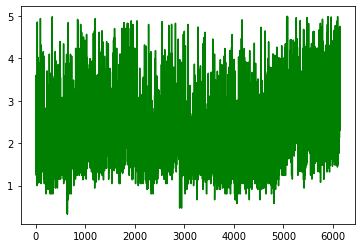

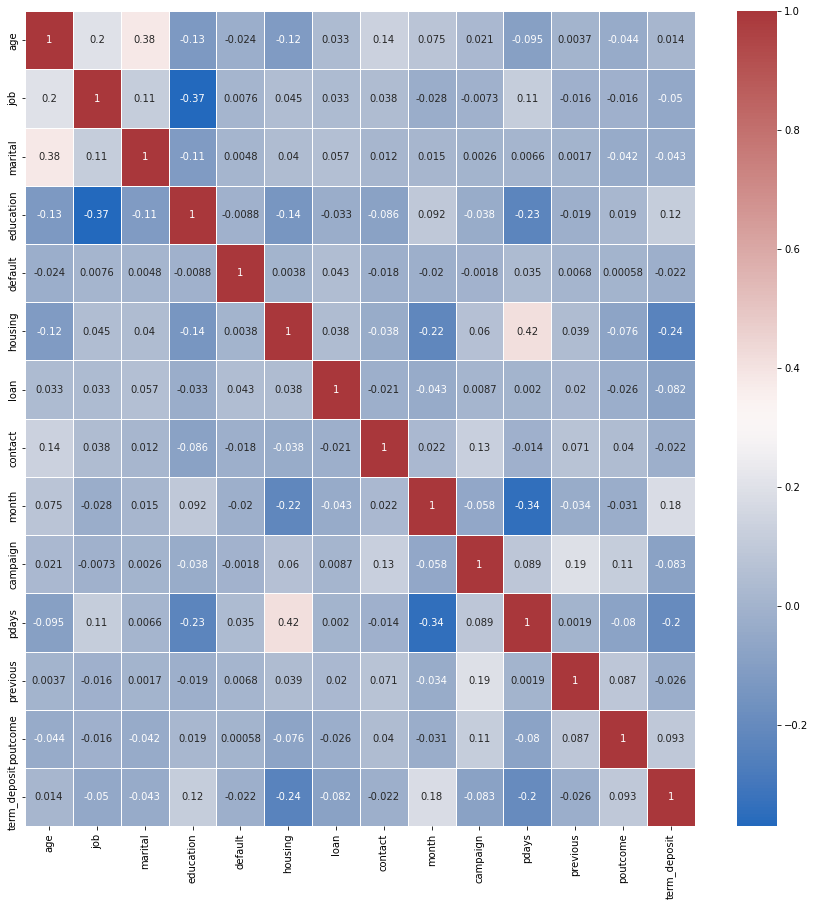

In [4]:
pwd = os.getcwd()
df = pd.read_csv(pwd + '\\data\\bank.csv')

df['job'] = df['job'].map({'unknown': np.nan, 'student': 0, 'unemployed': 1, 'management': 2, 'technician': 3, 
                           'entrepreneur': 4, 'blue-collar': 5, 'admin.': 6, 'services': 7, 'self-employed': 8,  
                           'housemaid': 9, 'retired': 10})

df['marital'] = df['marital'].map({'unknown': np.nan, 'single': 0, 'married': 1, 'divorced': 2})

df['education'] = df['education'].map({'unknown': np.nan, 'primary': 1, 'secondary': 2, 'tertiary': 3})

df['default'] = df['default'].map({'no': 0, 'yes': 1})

df['housing'] = df['housing'].map({'no': 0, 'yes': 1})

df['loan'] = df['loan'].map({'no': 0, 'yes': 1})

df['contact'] = df['contact'].map({'unknown': np.nan, 'cellular': 1, 'telephone': 2})

df['month'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                               'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})

df['poutcome'] = df['poutcome'].map({'unknown': np.nan, 'failure': 0, 'success': 1, 'other': 2})

df['term_deposit'] = df['term_deposit'].map({'no': 0, 'yes': 1})
    
df = df.dropna()
df.reset_index(inplace=True)
df = df.drop(['balance', 'duration', 'day', 'index'], axis=1)

# print(df)

df_nums_smooth = check_for_anomaly(df)

features = list(df_nums_smooth.columns)
features.remove('term_deposit')

df_corr = df_nums_smooth.corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap=palette);

# Building decision tree

Accuracy:  0.858119101854865


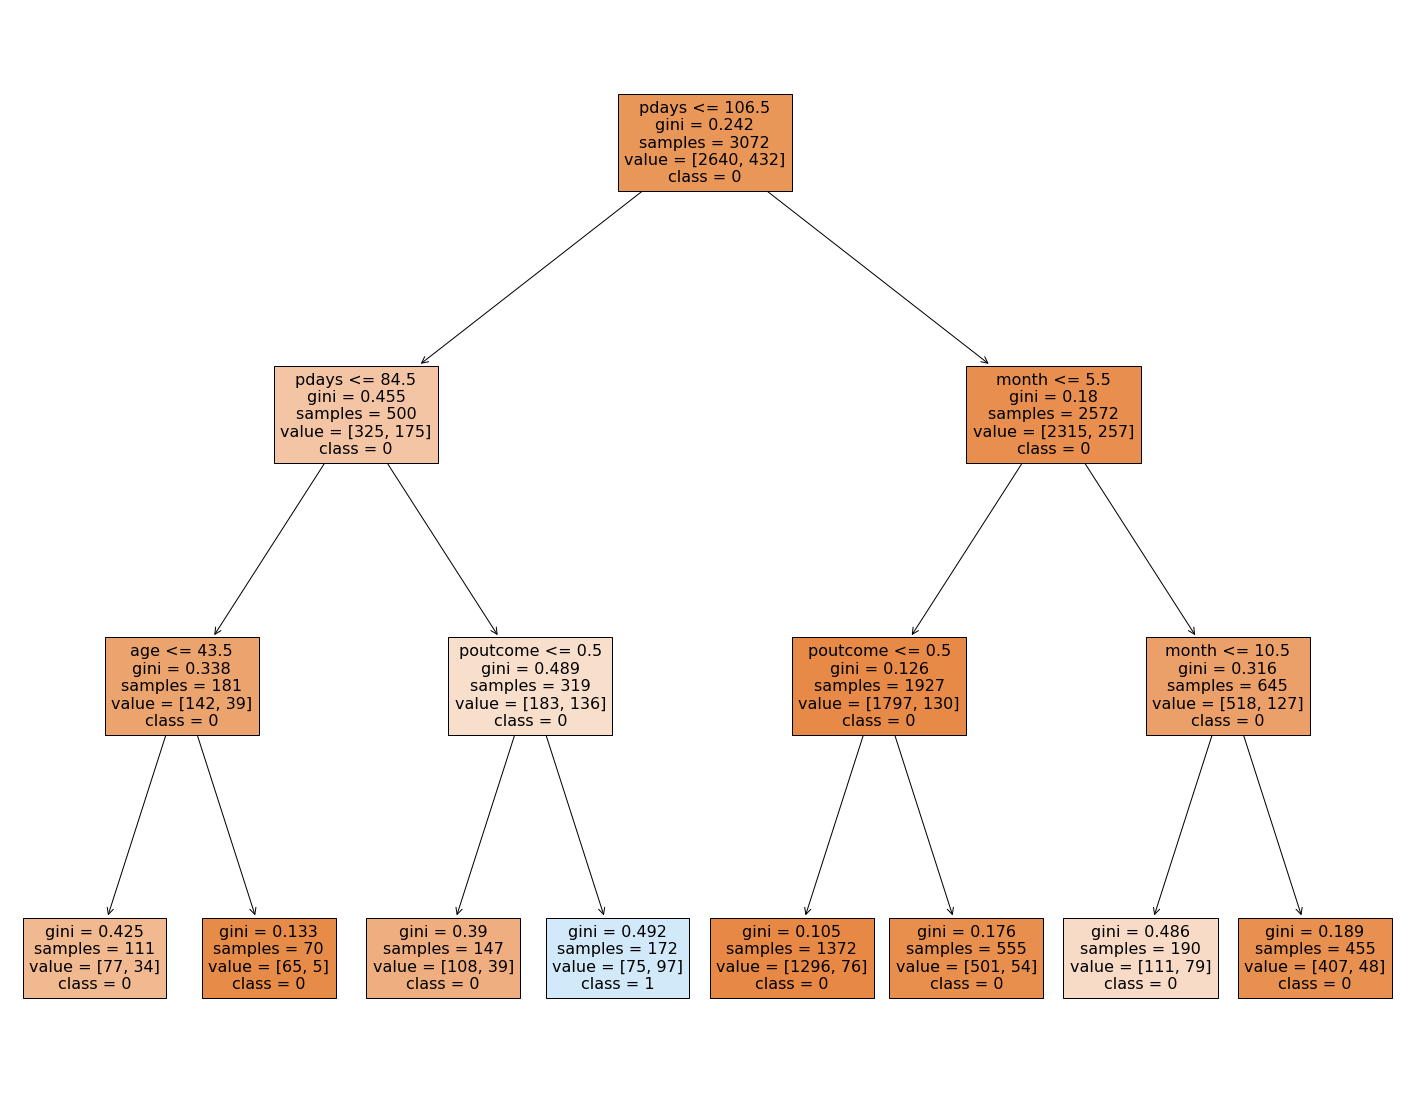

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_nums_smooth[features], df_nums_smooth['term_deposit'], test_size=0.5)

clf = DecisionTreeClassifier(random_state=0, max_depth=3)
model = clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

res = pd.DataFrame({'predicted': y_predicted, 'real': y_test})
print("Accuracy: ", accuracy_score(y_predicted, y_test))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=df_nums_smooth.drop('term_deposit', axis=1).columns, class_names=['0', '1'], filled=True)

# Building RandomForest

In [10]:
clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators = 3)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

res = pd.DataFrame({'predicted': y_predicted, 'real': y_test})

print("Accuracy: ", accuracy_score(y_predicted, y_test))

Accuracy:  0.8568174422388546
